In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 1, 1288 # unreplicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 42 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len + 1]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 80
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:18<23:58, 18.21s/it]

Epoch 001: | Training Loss: 2.125906072792895 | Validation Loss: 2.147046226973927


  2%|██                                                                                 | 2/80 [00:33<21:42, 16.70s/it]

Epoch 002: | Training Loss: 2.192661416664552 | Validation Loss: 2.1965516991571548


  4%|███                                                                                | 3/80 [00:49<20:55, 16.31s/it]

Epoch 003: | Training Loss: 2.1926981677073867 | Validation Loss: 2.198264734460673


  5%|████▏                                                                              | 4/80 [01:05<20:29, 16.18s/it]

Epoch 004: | Training Loss: 2.135539086773398 | Validation Loss: 1.9557499568396752


  6%|█████▏                                                                             | 5/80 [01:20<19:48, 15.84s/it]

Epoch 005: | Training Loss: 1.9399497949796993 | Validation Loss: 1.9691775402891527


  8%|██████▏                                                                            | 6/80 [01:35<19:12, 15.57s/it]

Epoch 006: | Training Loss: 1.8064267584203577 | Validation Loss: 1.7159442835991536


  9%|███████▎                                                                           | 7/80 [01:51<18:45, 15.42s/it]

Epoch 007: | Training Loss: 1.6919623073932464 | Validation Loss: 1.6456413619015196


 10%|████████▎                                                                          | 8/80 [02:06<18:32, 15.45s/it]

Epoch 008: | Training Loss: 1.6955504470996643 | Validation Loss: 1.6006834802277592


 11%|█████████▎                                                                         | 9/80 [02:21<18:08, 15.34s/it]

Epoch 009: | Training Loss: 1.6035367713154762 | Validation Loss: 1.5823087014189554


 12%|██████████▎                                                                       | 10/80 [02:37<18:06, 15.52s/it]

Epoch 010: | Training Loss: 1.5778048974866157 | Validation Loss: 1.5303013630963247


 14%|███████████▎                                                                      | 11/80 [02:53<17:51, 15.52s/it]

Epoch 011: | Training Loss: 1.5314111280977056 | Validation Loss: 1.5023646737457415


 15%|████████████▎                                                                     | 12/80 [03:08<17:31, 15.46s/it]

Epoch 012: | Training Loss: 1.4932283594123676 | Validation Loss: 1.4635797553106185


 16%|█████████████▎                                                                    | 13/80 [03:24<17:22, 15.55s/it]

Epoch 013: | Training Loss: 1.4574679893663152 | Validation Loss: 1.4554566571471887


 18%|██████████████▎                                                                   | 14/80 [03:39<17:00, 15.46s/it]

Epoch 014: | Training Loss: 1.4301365561577832 | Validation Loss: 1.3958757054915123


 19%|███████████████▍                                                                  | 15/80 [03:54<16:43, 15.43s/it]

Epoch 015: | Training Loss: 1.3986532072002968 | Validation Loss: 1.4268863441747264


 20%|████████████████▍                                                                 | 16/80 [04:10<16:30, 15.47s/it]

Epoch 016: | Training Loss: 1.3668824510993218 | Validation Loss: 1.348893868813821


 21%|█████████████████▍                                                                | 17/80 [04:25<16:16, 15.51s/it]

Epoch 017: | Training Loss: 1.3379942076442435 | Validation Loss: 1.3419430409002742


 22%|██████████████████▍                                                               | 18/80 [04:42<16:16, 15.75s/it]

Epoch 018: | Training Loss: 1.3233883942841753 | Validation Loss: 1.289181126913893


 24%|███████████████████▍                                                              | 19/80 [04:59<16:27, 16.19s/it]

Epoch 019: | Training Loss: 1.2970301359130851 | Validation Loss: 1.2769920317404861


 25%|████████████████████▌                                                             | 20/80 [05:15<16:15, 16.26s/it]

Epoch 020: | Training Loss: 1.3072307824601435 | Validation Loss: 1.3570160843910428


 26%|█████████████████████▌                                                            | 21/80 [05:31<15:55, 16.19s/it]

Epoch 021: | Training Loss: 1.2742471221275058 | Validation Loss: 1.2609665437575874


 28%|██████████████████████▌                                                           | 22/80 [05:48<15:39, 16.20s/it]

Epoch 022: | Training Loss: 1.2388478690440614 | Validation Loss: 1.2429180746778437


 29%|███████████████████████▌                                                          | 23/80 [06:03<15:14, 16.04s/it]

Epoch 023: | Training Loss: 1.2064085720264874 | Validation Loss: 1.2080110125585433


 30%|████████████████████████▌                                                         | 24/80 [06:19<14:55, 16.00s/it]

Epoch 024: | Training Loss: 1.183920402144509 | Validation Loss: 1.2053311505448927


 31%|█████████████████████████▋                                                        | 25/80 [06:35<14:31, 15.85s/it]

Epoch 025: | Training Loss: 1.1532701296509225 | Validation Loss: 1.1627908972425198


 32%|██████████████████████████▋                                                       | 26/80 [06:51<14:16, 15.87s/it]

Epoch 026: | Training Loss: 1.1168495460477132 | Validation Loss: 1.1597815095831494


 34%|███████████████████████████▋                                                      | 27/80 [07:08<14:30, 16.43s/it]

Epoch 027: | Training Loss: 1.0910654248207412 | Validation Loss: 1.1199322927982436


 35%|████████████████████████████▋                                                     | 28/80 [07:27<14:41, 16.96s/it]

Epoch 028: | Training Loss: 1.0887741347255453 | Validation Loss: 1.1162724741008303


 36%|█████████████████████████████▋                                                    | 29/80 [07:43<14:08, 16.64s/it]

Epoch 029: | Training Loss: 1.0549096201486559 | Validation Loss: 1.0939680507423681


 38%|██████████████████████████████▊                                                   | 30/80 [07:58<13:32, 16.25s/it]

Epoch 030: | Training Loss: 1.0266411561400945 | Validation Loss: 1.0764413470521978


 39%|███████████████████████████████▊                                                  | 31/80 [08:15<13:22, 16.37s/it]

Epoch 031: | Training Loss: 0.9980999697094918 | Validation Loss: 1.0625639388320642


 40%|████████████████████████████████▊                                                 | 32/80 [08:32<13:20, 16.68s/it]

Epoch 032: | Training Loss: 0.9859083447076449 | Validation Loss: 1.0460415914518024


 41%|█████████████████████████████████▊                                                | 33/80 [08:48<12:57, 16.54s/it]

Epoch 033: | Training Loss: 0.961754600470838 | Validation Loss: 1.075318022605476


 42%|██████████████████████████████████▊                                               | 34/80 [09:04<12:37, 16.46s/it]

Epoch 034: | Training Loss: 0.9355449829939315 | Validation Loss: 1.0392619070656803


 44%|███████████████████████████████████▉                                              | 35/80 [09:20<12:09, 16.20s/it]

Epoch 035: | Training Loss: 0.9116286763862399 | Validation Loss: 1.0441285902207051


 45%|████████████████████████████████████▉                                             | 36/80 [09:36<11:49, 16.13s/it]

Epoch 036: | Training Loss: 0.9056431906824823 | Validation Loss: 1.013186543359669


 46%|█████████████████████████████████████▉                                            | 37/80 [09:51<11:24, 15.92s/it]

Epoch 037: | Training Loss: 0.8703948844441111 | Validation Loss: 0.9951314122305004


 48%|██████████████████████████████████████▉                                           | 38/80 [10:07<11:00, 15.73s/it]

Epoch 038: | Training Loss: 0.8472282338251985 | Validation Loss: 1.0251357927234894


 49%|███████████████████████████████████████▉                                          | 39/80 [10:23<10:47, 15.78s/it]

Epoch 039: | Training Loss: 0.8240459126946388 | Validation Loss: 0.9687205782724083


 50%|█████████████████████████████████████████                                         | 40/80 [10:39<10:38, 15.97s/it]

Epoch 040: | Training Loss: 0.7998326193689691 | Validation Loss: 0.9745192883211539


 51%|██████████████████████████████████████████                                        | 41/80 [10:55<10:19, 15.89s/it]

Epoch 041: | Training Loss: 0.7795070893491739 | Validation Loss: 0.9586605560888938


 52%|███████████████████████████████████████████                                       | 42/80 [11:10<10:01, 15.82s/it]

Epoch 042: | Training Loss: 0.8516780432994812 | Validation Loss: 0.9464131008594407


 54%|████████████████████████████████████████████                                      | 43/80 [11:26<09:40, 15.68s/it]

Epoch 043: | Training Loss: 0.7511108878379701 | Validation Loss: 0.9227125907163007


 55%|█████████████████████████████████████████████                                     | 44/80 [11:41<09:20, 15.58s/it]

Epoch 044: | Training Loss: 0.7364834140951957 | Validation Loss: 0.9036296518570787


 56%|██████████████████████████████████████████████▏                                   | 45/80 [11:57<09:06, 15.62s/it]

Epoch 045: | Training Loss: 0.7036602388424332 | Validation Loss: 0.940366207459651


 57%|███████████████████████████████████████████████▏                                  | 46/80 [12:13<08:56, 15.79s/it]

Epoch 046: | Training Loss: 0.7001599737645656 | Validation Loss: 0.9660499918898311


 59%|████████████████████████████████████████████████▏                                 | 47/80 [12:29<08:45, 15.92s/it]

Epoch 047: | Training Loss: 0.6779320603341199 | Validation Loss: 0.9820137745743498


 60%|█████████████████████████████████████████████████▏                                | 48/80 [12:45<08:30, 15.95s/it]

Epoch 048: | Training Loss: 0.6678853999058487 | Validation Loss: 0.9223026551237894


 61%|██████████████████████████████████████████████████▏                               | 49/80 [13:01<08:16, 16.01s/it]

Epoch 049: | Training Loss: 0.6672209142360064 | Validation Loss: 0.8997337265845833


 62%|███████████████████████████████████████████████████▎                              | 50/80 [13:18<08:02, 16.08s/it]

Epoch 050: | Training Loss: 0.6177862194025237 | Validation Loss: 0.8858598022285952


 64%|████████████████████████████████████████████████████▎                             | 51/80 [13:34<07:51, 16.27s/it]

Epoch 051: | Training Loss: 0.6131280609487392 | Validation Loss: 0.8682670762779516


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [13:52<07:43, 16.56s/it]

Epoch 052: | Training Loss: 0.5873397542458633 | Validation Loss: 0.8829066485439966


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [14:10<07:40, 17.07s/it]

Epoch 053: | Training Loss: 0.5687005511952128 | Validation Loss: 0.8553145147791696


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [14:28<07:30, 17.33s/it]

Epoch 054: | Training Loss: 0.548407887124796 | Validation Loss: 0.8951230418244633


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [14:46<07:18, 17.53s/it]

Epoch 055: | Training Loss: 0.5852622083855357 | Validation Loss: 1.0317244141473683


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [15:04<07:03, 17.65s/it]

Epoch 056: | Training Loss: 0.5803663004893692 | Validation Loss: 0.8811556997649167


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [15:22<06:49, 17.79s/it]

Epoch 057: | Training Loss: 0.5182787593952604 | Validation Loss: 0.8477310122699913


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [15:40<06:34, 17.93s/it]

Epoch 058: | Training Loss: 0.5084590947367745 | Validation Loss: 0.8518302500794787


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [15:58<06:18, 18.00s/it]

Epoch 059: | Training Loss: 0.5027116399954726 | Validation Loss: 0.9120280135662184


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [16:16<06:00, 18.03s/it]

Epoch 060: | Training Loss: 0.49671455004668214 | Validation Loss: 0.8548400861407639


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [16:34<05:41, 17.98s/it]

Epoch 061: | Training Loss: 0.4807061780704541 | Validation Loss: 0.8836020624965703


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [16:52<05:22, 17.92s/it]

Epoch 062: | Training Loss: 0.45847947636773323 | Validation Loss: 0.8204325019219599


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [17:08<04:54, 17.31s/it]

Epoch 063: | Training Loss: 0.4587267883144798 | Validation Loss: 0.9318289018552238


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [17:23<04:28, 16.77s/it]

Epoch 064: | Training Loss: 0.46104613684719015 | Validation Loss: 0.8554739391585009


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [17:39<04:05, 16.39s/it]

Epoch 065: | Training Loss: 0.4225818020604604 | Validation Loss: 0.8434897929156592


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [17:54<03:45, 16.12s/it]

Epoch 066: | Training Loss: 0.4221433374928016 | Validation Loss: 0.8660648640142669


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [18:10<03:26, 15.90s/it]

Epoch 067: | Training Loss: 0.4938424464326592 | Validation Loss: 0.8637132398579099


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [18:30<03:27, 17.32s/it]

Epoch 068: | Training Loss: 0.39136788950694595 | Validation Loss: 0.8573932874640193


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [18:49<03:13, 17.61s/it]

Epoch 069: | Training Loss: 0.3853828454803032 | Validation Loss: 0.8476876291113162


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [19:08<03:00, 18.07s/it]

Epoch 070: | Training Loss: 0.3727219802640432 | Validation Loss: 0.8453825023196159


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [19:27<02:46, 18.52s/it]

Epoch 071: | Training Loss: 0.3705400297754997 | Validation Loss: 0.816491455386538


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [19:45<02:26, 18.30s/it]

Epoch 072: | Training Loss: 0.3628093320058242 | Validation Loss: 0.8146643015222812


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [20:02<02:05, 17.98s/it]

Epoch 073: | Training Loss: 0.3871164165886235 | Validation Loss: 0.8499395311425585


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [20:20<01:47, 17.84s/it]

Epoch 074: | Training Loss: 0.3721213463591117 | Validation Loss: 0.8272119585527192


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [20:37<01:28, 17.73s/it]

Epoch 075: | Training Loss: 0.3489652367516119 | Validation Loss: 0.8658340234275258


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [20:55<01:10, 17.63s/it]

Epoch 076: | Training Loss: 0.3341167178214266 | Validation Loss: 0.8273941814352613


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [21:12<00:52, 17.57s/it]

Epoch 077: | Training Loss: 0.34642458543470617 | Validation Loss: 0.8939114806302096


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [21:30<00:34, 17.49s/it]

Epoch 078: | Training Loss: 0.31473168186592254 | Validation Loss: 0.8686820405338882


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [21:47<00:17, 17.46s/it]

Epoch 079: | Training Loss: 0.3180857871766597 | Validation Loss: 0.8395924874401968


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [22:11<00:00, 16.64s/it]

Epoch 080: | Training Loss: 0.3278748209648161 | Validation Loss: 0.9160391458677589


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,6,6
1,5,6
2,6,6
3,5,5
4,4,4
...,...,...
6951,0,1
6952,5,4
6953,3,5
6954,6,7


In [25]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.7625071880391029


In [26]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm2.pth') # model trained on unreplicated dataset

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

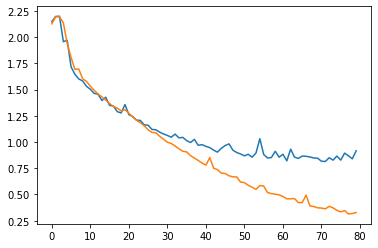

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

Overfitting seems to occur ~50 epochs | Overall accuracy of the model seems to be the same across replicated/unreplicated datasets